# 02 - Feature Engineering

This notebook covers:
- Feature creation and selection
- Interaction features
- Saving engineered dataset

In [1]:
import pandas as pd
df = pd.read_csv('../data/cleaned_train.csv')

## Create Interaction Features

In [2]:
df['balance_duration'] = df['balance'] * df['duration']
df['age_education'] = df['age'] * df['education']
df

,id,age,education,balance,day,duration,campaign,pdays,previous,y,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,balance_duration,age_education
0,0.0,0.106310,2,-0.422083,25.0,-0.510829,0.155597,-0.302803,-0.223475,0.0,...,False,False,False,False,False,False,False,True,0.215612,0.212620
1,1.0,-0.289776,2,-0.243316,18.0,-0.261338,-0.580100,-0.302803,-0.223475,0.0,...,False,False,False,False,False,False,False,True,0.063588,-0.579552
2,2.0,-0.487819,2,-0.212287,14.0,-0.532843,-0.212251,-0.302803,-0.223475,0.0,...,False,True,False,False,False,False,False,True,0.113116,-0.975637
3,3.0,-1.379012,2,-0.412563,28.0,-0.903409,-0.212251,-0.302803,-0.223475,0.0,...,False,True,False,False,False,False,False,True,0.372713,-2.758024
4,4.0,-1.478033,2,-0.111092,3.0,2.369319,-0.580100,-0.302803,-0.223475,1.0,...,False,False,False,False,False,False,False,True,-0.263212,-2.956066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,749995.0,-1.180969,2,0.027479,4.0,2.750893,-0.212251,-0.302803,-0.223475,1.0,...,False,False,False,False,False,False,False,True,0.075591,-2.361938
749996,749996.0,2.779889,3,-0.202062,19.0,-0.620898,-0.580100,-0.302803,-0.223475,0.0,...,False,False,False,False,False,False,False,True,0.125460,8.339667
749997,749997.0,0.898482,2,-0.348038,17.0,-0.525505,-0.580100,-0.302803,-0.223475,0.0,...,False,False,False,False,False,False,False,True,0.182895,1.796963
749998,749998.0,-0.883905,2,-0.521163,26.0,-0.543849,1.259142,-0.302803,-0.223475,0.0,...,False,False,False,False,False,False,False,True,0.283434,-1.767809


In [3]:
df.columns

Index(['id', 'age', 'education', 'balance', 'day', 'duration', 'campaign',
       'pdays', 'previous', 'y', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single', 'default_yes',
       'housing_yes', 'loan_yes', 'contact_telephone', 'contact_unknown',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'poutcome_other', 'poutcome_success', 'poutcome_unknown',
       'balance_duration', 'age_education'],
      dtype='object')

## Feature Selection
- use of feature importance from Random Forest tree-based model for selection

<Axes: >

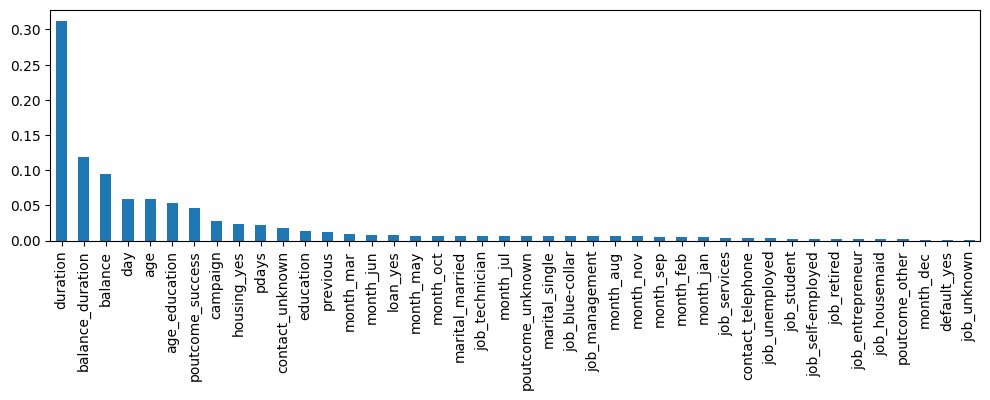

In [4]:
from sklearn.ensemble import RandomForestClassifier
X = df.drop(['y', 'id'], axis=1)
y = df['y']

rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot.bar(figsize=(12,3))

In [5]:
importances.sort_values(ascending=False)

duration             0.312627
balance_duration     0.118413
balance              0.094298
day                  0.059466
age                  0.058580
age_education        0.053416
poutcome_success     0.046791
campaign             0.028267
housing_yes          0.022891
pdays                0.021560
contact_unknown      0.018393
education            0.013720
previous             0.011700
month_mar            0.009350
month_jun            0.008176
loan_yes             0.008074
month_may            0.007097
month_oct            0.007041
marital_married      0.007020
job_technician       0.006708
month_jul            0.006625
poutcome_unknown     0.006603
marital_single       0.006455
job_blue-collar      0.006404
job_management       0.006352
month_aug            0.006169
month_nov            0.005880
month_sep            0.005197
month_feb            0.004853
month_jan            0.004384
job_services         0.003965
contact_telephone    0.003806
job_unemployed       0.003067
job_studen

## Save Feature Engineered Dataset

In [6]:
df.to_csv('../data/fe_train.csv', index=False)